<a href="https://colab.research.google.com/github/ChrisMath26/Fisica-Computacional/blob/main/Integraci%C3%B3n%20y%20Derivaci%C3%B3n/Integracion_Derivacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Integración Numérica

Calcular integrales de funciones es una de las tareas más comunes en varios problemas de física. De su curso de análisis numérico recordará que existen varios métodos numéricos para calcular integrales como por ejemplo

<ul>
    <li>Método del Trapecio
    <li>Método de Simpson
    <li>Método de Cuadratura Gaussiana
</ul>

## Método del trapecio
En este método, dividimos la función dada en puntos equiespaciados $x_0, x_1, x_2, ... , x_N$ con distancia $\Delta x$, y la integral puede ser aproximada a

$$
\int_a^b f(x)dx \approx \sum_{i=1}^N \frac{f(x_i)+f(x_{i-1})}{2}\Delta x
$$

Un poco de álgebra nos permite deducir que el r.h.s se reduce a la expresión

$$
\int_a^b f(x)dx \approx \left[ \frac{f(x_0)+f(x_N)}{2}+\sum_{i=1}^{N-1} f(x_i) \right]\Delta x
$$

### Implementación



In [ ]:
import numpy as np
def fun(x):
  return np.sqrt(1-x**2)

def trapecio(f,a,b,h):
  x=np.arange(a,b,h)
  I=((f(a)+f(b))/2 + np.sum(f(x[1:-1])))*h
  return I
integral = trapecio(fun,0,0.5,0.001)
integral


0.47743908864797513

## Método de Simpson

El método de Simpson por su parte, hace uso de una mejor aproximación a la función ajustando a una parábola 3 puntos consecutivos.
Lo cual aproxima la integral a

$$
\int_a^b f(x)dx \approx \frac{\Delta x}{3} \sum_{k=impares}^{N-1} (f(x_{k-1})+4f(x_k)+f(x_{k+1}))
$$

Esto implica que el número de puntos de la función debe ser impar. En caso de ser par es necesario agregar el área del último trozo que es

$$
A_{ultimo \; trozo} = \frac{\Delta x}{12}[5f(x_N)+8f(x_{N-1})-f(x_{N-2})]
$$

###Implementación

In [ ]:
def simpson(f,a,b,h):
  x=np.arange(a,b,h)
  fun=f(x)
  I=np.sum(fun[0:-2:2]+4*fun[1:-1:2]+fun[2::2])*h/3
  return I
integral1 = simpson(fun,0,0.5,0.001)
integral1

0.4765725352878875

Decargue los datos de velocidad de una partícula tomada para diferentes instantes de tiempo desde el siguiente enlace http://websites.umich.edu/~mejn/cp/data/velocities.txt La primera columna representa el tiempo y la segunda representa la velocidad. Usando los métodos de integración propuestos halle la distancia recorrida por la partícula.

In [ ]:
import numpy as np
datos=np.loadtxt('velocities.txt', unpack=True)
datos

array([[ 0.00000e+00,  1.00000e+00,  2.00000e+00,  3.00000e+00,
         4.00000e+00,  5.00000e+00,  6.00000e+00,  7.00000e+00,
         8.00000e+00,  9.00000e+00,  1.00000e+01,  1.10000e+01,
         1.20000e+01,  1.30000e+01,  1.40000e+01,  1.50000e+01,
         1.60000e+01,  1.70000e+01,  1.80000e+01,  1.90000e+01,
         2.00000e+01,  2.10000e+01,  2.20000e+01,  2.30000e+01,
         2.40000e+01,  2.50000e+01,  2.60000e+01,  2.70000e+01,
         2.80000e+01,  2.90000e+01,  3.00000e+01,  3.10000e+01,
         3.20000e+01,  3.30000e+01,  3.40000e+01,  3.50000e+01,
         3.60000e+01,  3.70000e+01,  3.80000e+01,  3.90000e+01,
         4.00000e+01,  4.10000e+01,  4.20000e+01,  4.30000e+01,
         4.40000e+01,  4.50000e+01,  4.60000e+01,  4.70000e+01,
         4.80000e+01,  4.90000e+01,  5.00000e+01,  5.10000e+01,
         5.20000e+01,  5.30000e+01,  5.40000e+01,  5.50000e+01,
         5.60000e+01,  5.70000e+01,  5.80000e+01,  5.90000e+01,
         6.00000e+01,  6.10000e+01,  6.2

In [ ]:

Sol_I=integrate.simpson(datos[1],datos[0])
print(f'el valor aproximado de la integral a través del método de simpson es: {Sol_I}')


el valor aproximado de la integral a través del método de simpson es: 8.222689999999998


La teoría de sólidos de Debye dice que la capacidad calórica de un sólido -la cantidad de energíua que requiere para aumentar su temperatura-, puede calcularse estudiando la interacción de los átomos como pequeñas masas unidas por resortes (enlaces) de acuerdo a la siguiente ecuación

$$
C_V = 9V\rho k_B \left (\frac{T}{\theta_D} \right)^3 \int_0^{\theta_D/T} \frac{x^4e^x}{(e^x-1)^2}dx
$$

donde $\theta_D$ es la temperatura de Debye que depende de la densidad y la velocidad del sonido en el sólido.

Calcule $C_V$ en función de la temperatura para un sólido de Volumen  $V=$1000cm$^3$ de aluminio cuya densidad es $\rho = 6.022 \times 10^{28}$ atomos/m$^3$ y $\theta_D = 428$K.

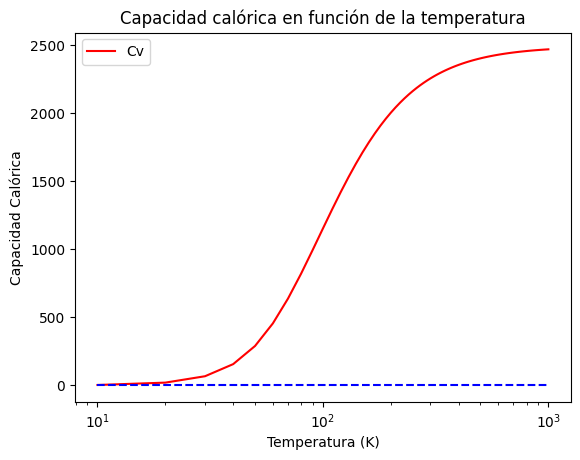

In [ ]:
from matplotlib import pyplot as plt
from scipy import constants
#valores de las variables del problema
theta=428
K=constants.Boltzmann
rho=6.022e28
V=1e-3
#definiendo la función a integrar
def funcion(x):
   g = x**4*np.exp(x)/(np.exp(x)-1)**2
   return g
T=np.linspace(10,1000,100)
#"Alocar" memoria
Cv_sol=np.zeros(len(T))
for i in range(len(T)):
  T_c=T[i]
  integral2=integrate.quad(funcion,0,theta/T_c)
  Cv_sol[i] = 9 * V * rho * K *(T_c/theta)**3*integral2[0]

#GRÁFICO
plt.figure
plt.plot(T,Cv_sol,'r')
#Infromación de interés
plt.xlabel("Temperatura (K)")
plt.ylabel('Capacidad Calórica')
plt.title('Capacidad calórica en función de la temperatura')
plt.xscale('log')
plt.plot([min(T),max(T)],[0,0],'b--')
plt.legend(['Cv',])


# Derivación Numérica

La derivación es un problema mucho más simple que la integración como veremos a continuación. De los textos de cálculo tenemos que

$$
\frac{df}{dx}= \lim_{h\to 0} \frac{f(x+h)-f(x)}{h}
$$

Cuando queremos derivar numéricamente tenemos varias opciones

<ol>
    <li> Diferencia hacia adelante (Forward Difference): En este caso si nos encontramos en punto de interés $x$, aproximamos la derivada con un valor posterior a este
        $$
        \frac{df}{dx} \approx \frac{f(x+h)-f(x)}{h}
        $$        
    <li> Diferencia hacia atrás (Backward Difference): La aproximación de la derivada se hace con un valor anterior al punto de interés $x$
        $$
        \frac{df}{dx} \approx \frac{f(x)-f(x-h)}{h}
        $$        
<li> Diferencia centrada (Central Difference): Se usa un combinación del punto anterior y el punto posterior
        $$
        \frac{df}{dx} \approx \frac{f(x+h)-f(x-h)}{2h}
        $$     
        
</ol>




Usando los mismos datos que descargó para el ejercicio 3, grafique la aceleración instantánea de la partícula en función del tiempo usando métodos de diferencias finitas.

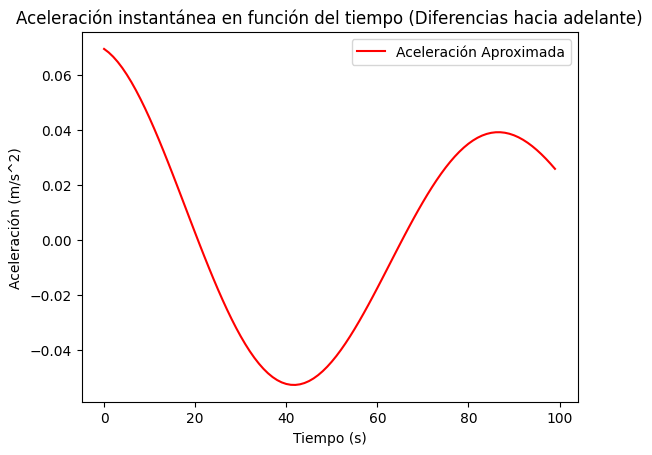

In [ ]:
#Método diferencia hacia adelante (Forward diference)
# Datos del ejercicio 3
tiempo = datos[0]
velocidad = datos[1]

#implementación del Método de diferencias finitas hacia adelante (Forward difference)
h =np.mean(np.diff(tiempo)) #una manera de calcular h en general en nuestro en particular, simplemente  h = 1.
def ForwardDif(x, f, h):
    df_aprox = np.zeros(len(x)-1)  # Inicializar un array de ceros para almacenar las aproximaciones de la derivada "alocar memoria"

    for i in range(len(x) - 1):
        df_aprox[i] = (f[i + 1] - f[i]) / h #f representa los valores de la velocidad en el tiempo, h: El paso entre los puntos en el eje x

    return df_aprox

# Calcular la aceleración utilizando el método de diferencias finitas hacia adelante

aceleracion_aprox = ForwardDif(tiempo, velocidad, h)

# Graficar la aceleración en función del tiempo
plt.figure
plt.plot(tiempo[:-1], aceleracion_aprox, 'r', label='Aceleración Aproximada')
plt.xlabel('Tiempo (s)' )
plt.ylabel('Aceleración (m/s^2)')
plt.title('Aceleración instantánea en función del tiempo (Diferencias hacia adelante)')
plt.legend()
plt.show()



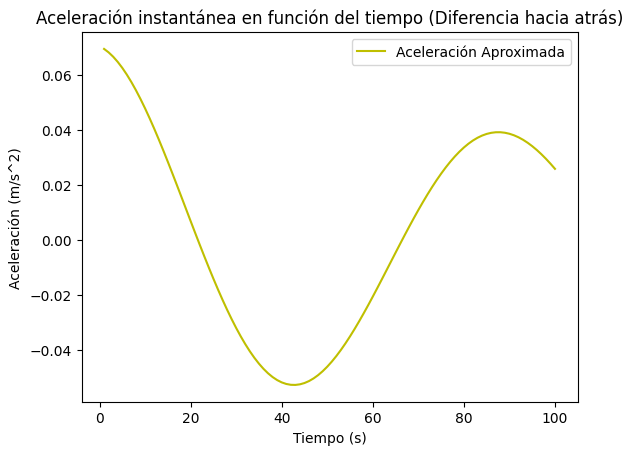

In [ ]:
#Método diferencia hacia atras (Backward Difference)

#implementación del Método de diferencias finitas hacia atras (Backward difference)
h_prom = np.mean(np.diff(tiempo))
def BackwardDif(x, f, h):
    df1_aprox = np.zeros(len(x))  # Inicializar un array de ceros para almacenar las aproximaciones de la derivada "alocar memoria"

    for i in range(1,len(x)):
        df1_aprox[i] = (f[i] - f[i-1]) / h #f representa los valores de la velocidad en el tiempo, h: El paso entre los puntos en el eje x(tiempo)

    return df1_aprox

# Calcular la aceleración utilizando el método de diferencias finitas hacia adelante


aceleracion_aprox1 = BackwardDif(tiempo, velocidad, h_prom)

# Graficar la aceleración en función del tiempo
plt.figure
plt.plot(tiempo[1:], aceleracion_aprox1[1:], 'y', label='Aceleración Aproximada')
plt.xlabel('Tiempo (s)' )
plt.ylabel('Aceleración (m/s^2)')
plt.title('Aceleración instantánea en función del tiempo (Diferencia hacia atrás)')
plt.legend()
plt.show()



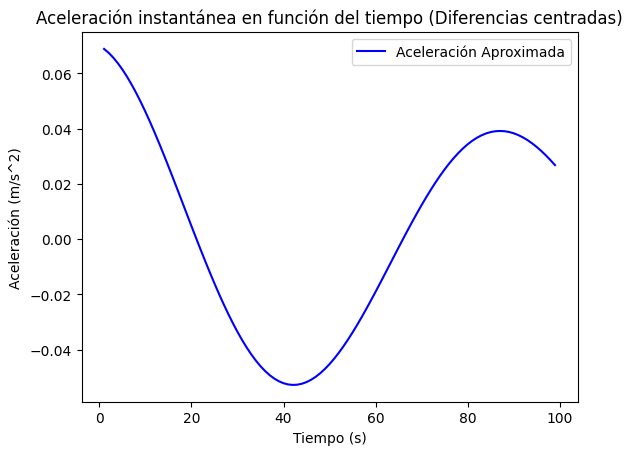

In [ ]:
# Método de diferencias finitas centradas (Central Difference)
h_prom2 = np.mean(np.diff(tiempo))  # Calculamos h como el promedio de los intervalos de tiempo

def CentralDif(x, f, h):
    df2_aprox = np.zeros(len(x))

    for i in range(1, len(x) - 1):  # Iteramos desde el segundo elemento hasta el penúltimo
        df2_aprox[i] = (f[i+1] - f[i-1]) / (2 * h)

    return df2_aprox

# Calcular la aceleración utilizando el método de diferencias finitas centradas
aceleracion_aprox2 = CentralDif(tiempo, velocidad, h_prom2)

# Graficar la aceleración en función del tiempo
plt.figure()
plt.plot(tiempo[1:-1], aceleracion_aprox2[1:-1], 'b', label='Aceleración Aproximada')  # Excluir el primer y último elemento para evitar problemas de índices
plt.xlabel('Tiempo (s)')
plt.ylabel('Aceleración (m/s^2)')
plt.title('Aceleración instantánea en función del tiempo (Diferencias centradas)')
plt.legend()
plt.show()
